In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

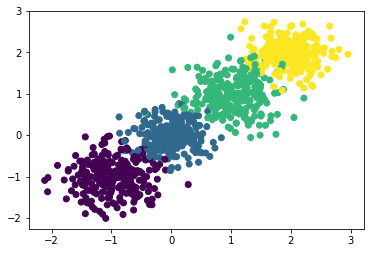

In [4]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=[[-1,-1], [0,0], [1,1], [2,2]],
                  cluster_std=[0.4, 0.3, 0.4, 0.3],
                  random_state=9)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

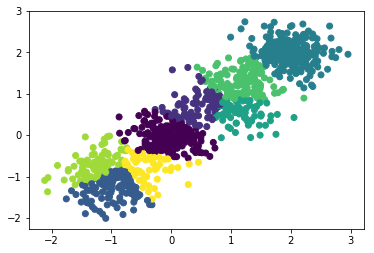

Calinski-Harabasz Score 2220.95253905


In [8]:
from sklearn.cluster import Birch
y_pred = Birch(n_clusters = None).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

from sklearn import metrics
print "Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred)

### 当输入可选参数n_clusters = 4时，看看它的分数

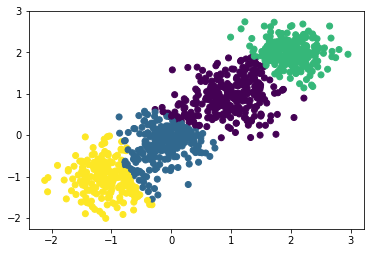

Calinski-Harabasz Score 2816.40765268


In [9]:
y_pred = Birch(n_clusters=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
print "Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred) 

### 对于threshold和branching_factor我们前面还没有去调参，使用了默认的threshold值0.5和默认的branching_factor值50.现在我们将threshold从0.5降低为0.3，让BIRCH算法第一阶段的CF Tree规模变大，并观察Calinski-Harabasz 分数。

In [10]:
y_pred = Birch(n_clusters = 4, threshold = 0.3).fit_predict(X)
print "Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred)

Calinski-Harabasz Score 3295.63492273


### 可见此时的聚类效果有了进一步的提升，那么是不是threshold越小越好呢？我们看看threshold从0.3降低为0.1时的情况。

In [12]:
y_pred = Birch(n_clusters=4, threshold=0.1).fit_predict(X)
print "Calinski-Harabasz Score: ", metrics.calinski_harabaz_score(X, y_pred)

Calinski-Harabasz Score:  2155.10021808


### 对应的Calinski-Harabasz 分数输出为：        Calinski-Harabasz Score 2155.10021808
　　　　
    也就是说threshold不是越小聚类效果越好。

### 我们基于threshold为0.3的情况，调试下branching_factor，将branching_factor从50降低为20.让BIRCH算法第一阶段的CF Tree规模变大。

In [14]:
y_pred = Birch(n_clusters = 4, threshold = 0.3, branching_factor = 20).fit_predict(X)
print "Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred) 

 Calinski-Harabasz Score 3301.80231064


### 可见调试branching_factor也可以让聚类分数提高。那么和threshold类似，是不是branching_factor越小越好呢？我们将branching_factor从20降低为10，观察聚类分数：

In [15]:
y_pred = Birch(n_clusters = 4, threshold = 0.3, branching_factor = 10).fit_predict(X)
print "Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred) 

Calinski-Harabasz Score 2800.87840962


# 小结：也就是说和threshold类似，branching_factor不是越小聚类效果越好，需要调参。